# 붓꽃 품종 분류

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

In [15]:
iris_data = load_iris()
print("iris_dataset의 키 : \n",iris_data.keys())
print("타깃의 이름:",iris_data['target_names'])
print("특성의 이름 : \n",iris_data['feature_names'])
print("data의 타입:",type(iris_data['data']))
print("data의 크기 : ",iris_data['data'].shape)
print("data의 처음 다섯 행 : \n",iris_data['data'][:5])
print("target의 타입:",type(iris_data['target']))
print("target의 크기 : ",iris_data['target'].shape)
print("타깃:\n",iris_data['target'])

iris_dataset의 키 : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름 : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 타입: <class 'numpy.ndarray'>
data의 크기 :  (150, 4)
data의 처음 다섯 행 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target의 타입: <class 'numpy.ndarray'>
target의 크기 :  (150,)
타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'],iris_data['target'],random_state=0
)
print("X_train의 크기 :",X_test.shape)
print("y_Train의 크기 : ",y_train.shape)
print("X test 크기 : ",X_test.shape)
print("y_test 크기 : ",y_test.shape)


X_train의 크기 : (38, 4)
y_Train의 크기 :  (112,)
X test 크기 :  (38, 4)
y_test 크기 :  (38,)


- pd.plotting.scatter_matrix
    - 여러 변수 (컬럼)들의 쌍(pair) 을 모두 조합해서 산점도를 그린다. 즉, 행렬 형태로 그래프를 배치한다.
    - (i,j) 위치에는 변수들이 들어가고, 대각선에는 히스토그램 표시
    - iris_dataframe의 indices가 sepal length, sepal width, petal length, petal width 이므로 그애 맞춰 그려짐
- c = y_train 
    - c : color의 약자. y_train인 타깃에 클래스마다 색이  다르게 표시됨 (setosa, versicolor, irginica)
- hist_kwds = {'bins':2-}, s = 60
    - hist_kwds = {'bins':20} 대각선에 표시되는 히스토그램의 bin개수를 20개로 설정
    - s = 60 : 산점도의 점의 크기를 60으로 지정
- mglearn
    - 책에서 제공하는 보조 라이브러리. 학습용 유틸리티 패키지
- cmap
    - color map. 색상표 지정. cm3 는 3가지 색상

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

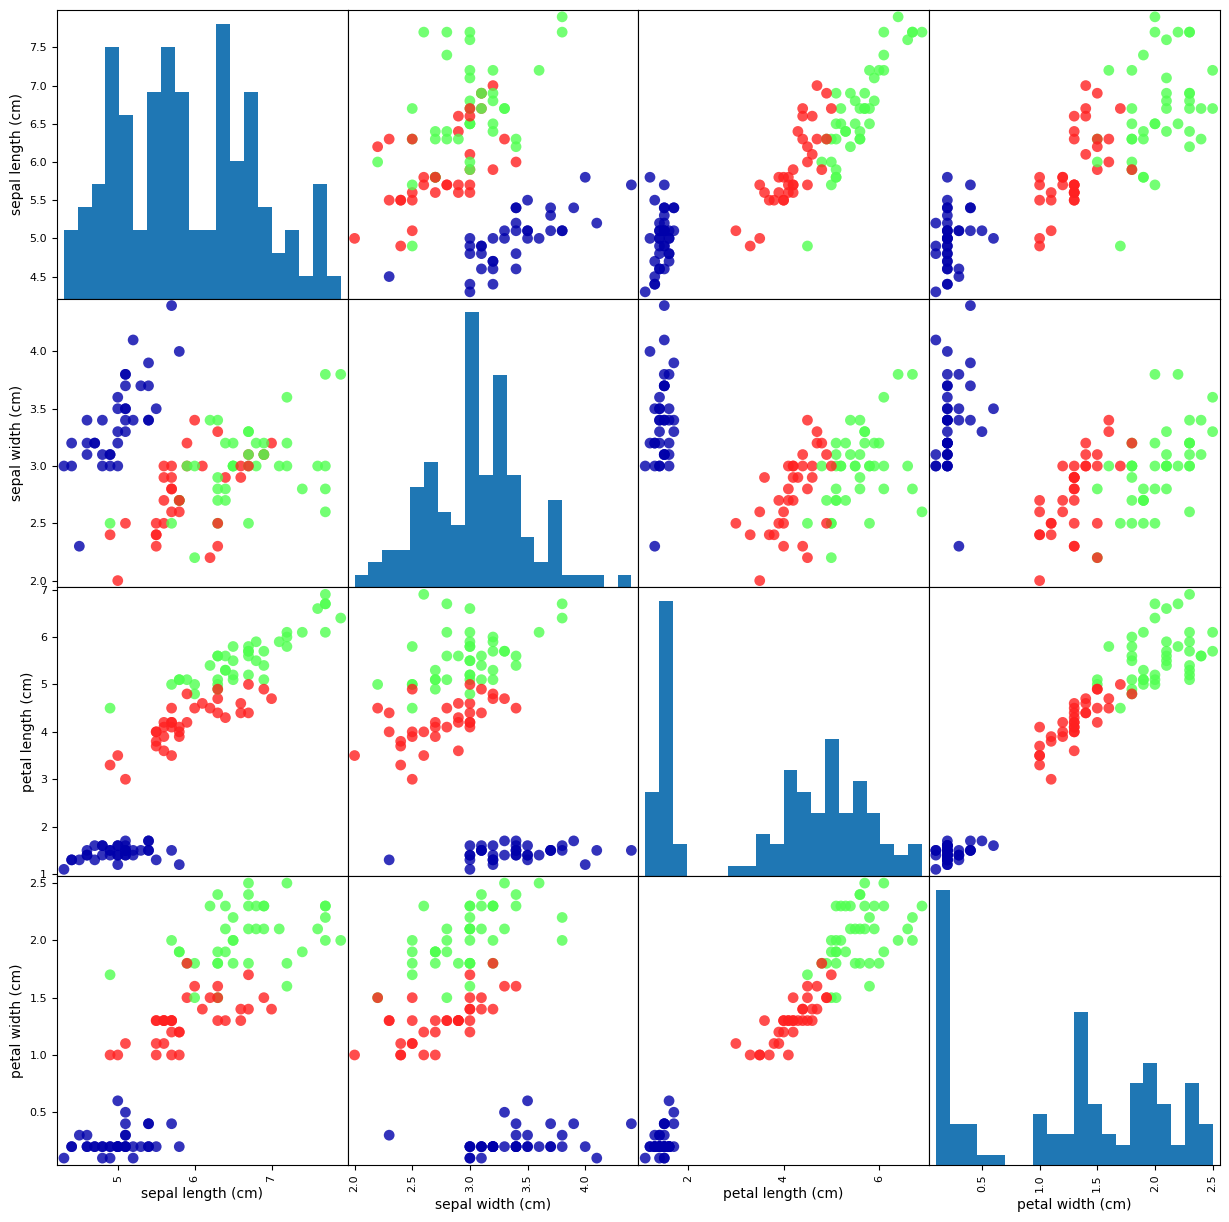

In [17]:
iris_dataframe = pd.DataFrame(X_train,columns=iris_data.feature_names)
pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker='o',
                           hist_kwds={'bins':20},s=60,alpha=0.8,cmap=mglearn.cm3)

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

# 예측
X_new = np.array([[5,2.0,1,0.2]])
prediction = knn.predict(X_new)
print("예측 : ",prediction)
print("예측한 타깃의 이름 : ", iris_data['target_names'][prediction])

# 모델 평가
y_pred = knn.predict(X_test)
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred==y_test)))
print("테스트 세트의 정확도 : {:.2f}".format(knn.score(X_test,y_test)))

예측 :  [0]
예측한 타깃의 이름 :  ['setosa']
테스트 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.97


# 지도학습 알고리즘

Text(0.5, 0, '첫번째 특성')

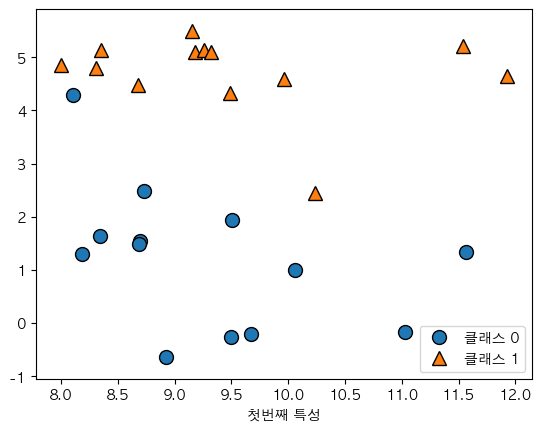

In [29]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("첫번째 특성")

Text(0, 0.5, '타깃')

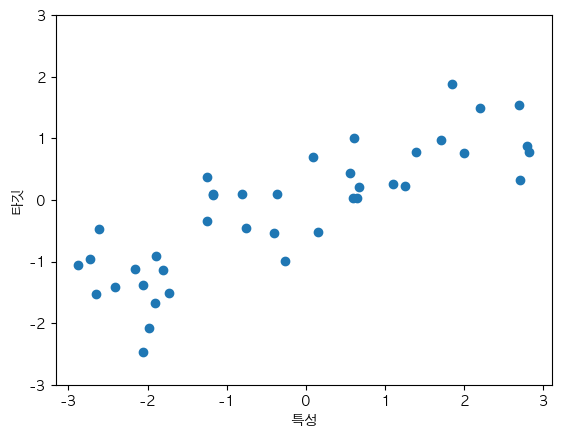

In [30]:
X, y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

In [32]:
cancer=load_breast_cancer()
print("cancer.keys(): \n",cancer.keys())
print("유방암 데이터의 형태:",cancer.data.shape)
print("클래스별 샘플 개수 : \n", {n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))})
print("특성 이름: \n",cancer.feature_names)

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 형태: (569, 30)
클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}
특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 최근접 이웃

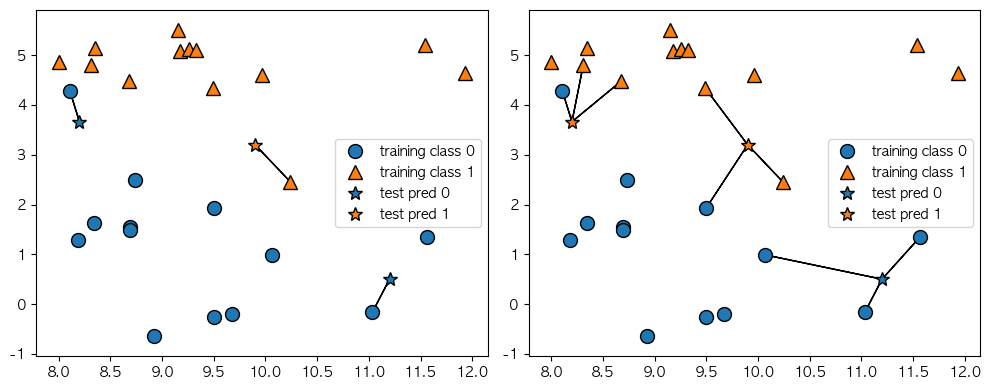

In [39]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
plt.sca(axes[0])
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.sca(axes[1])
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.tight_layout()

In [42]:
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]
print("데이터의 형태:",data.shape)
X,y=mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)

데이터의 형태: (506, 13)
X.shape: (506, 104)


테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


/var/folders/gw/jvr6w8xj12gc01xmg3zw29pw0000gn/T/ipykernel_52578/1172653564.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(loc=3)


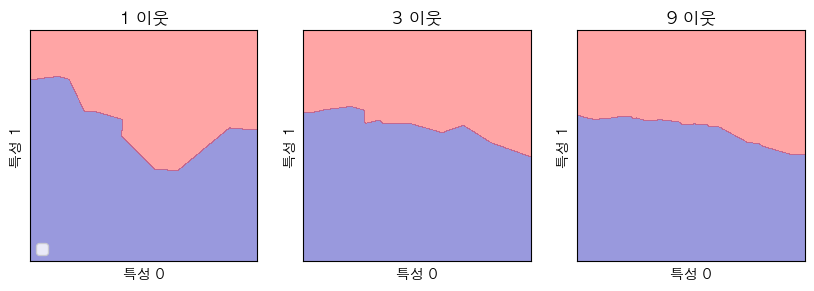

In [45]:
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print("테스트 세트 예측:",clf.predict(X_test))
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test,y_test)))


fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

- 이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다.
    - 이웃을 적게 사용하면 모델의 복잡도가 높다지고
    - 이웃을 많이 사용하면 복잡도는 낮아진다.

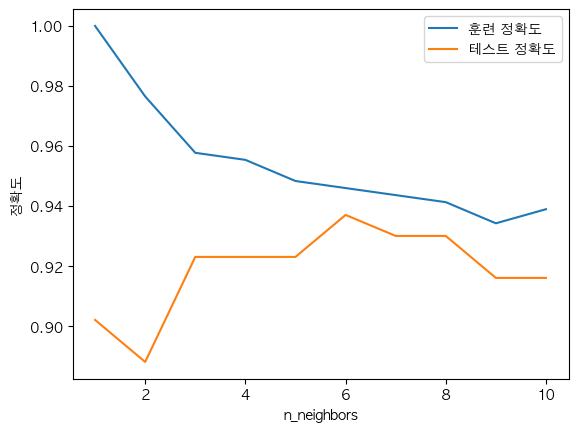

In [47]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

# 1 에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings,test_accuracy,label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

## K-최근접 이웃 회귀

In [50]:
from sklearn.neighbors import KNeighborsRegressor

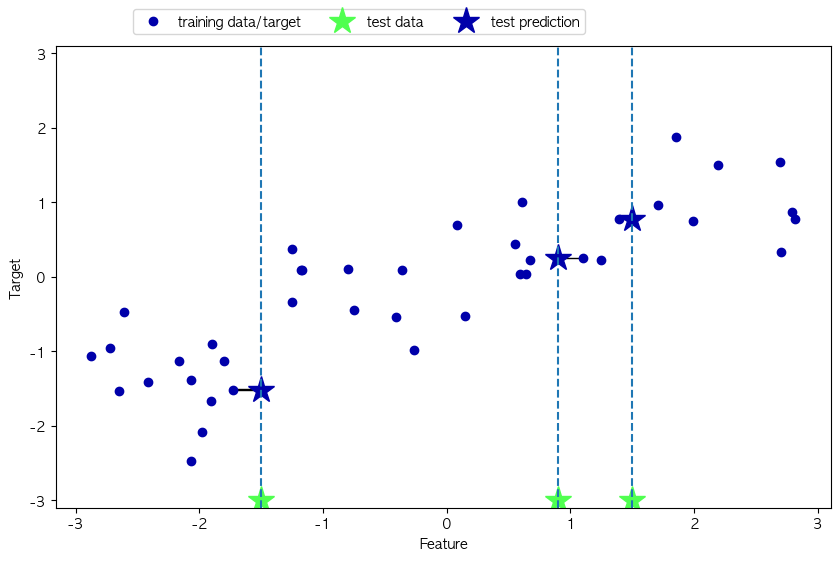

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

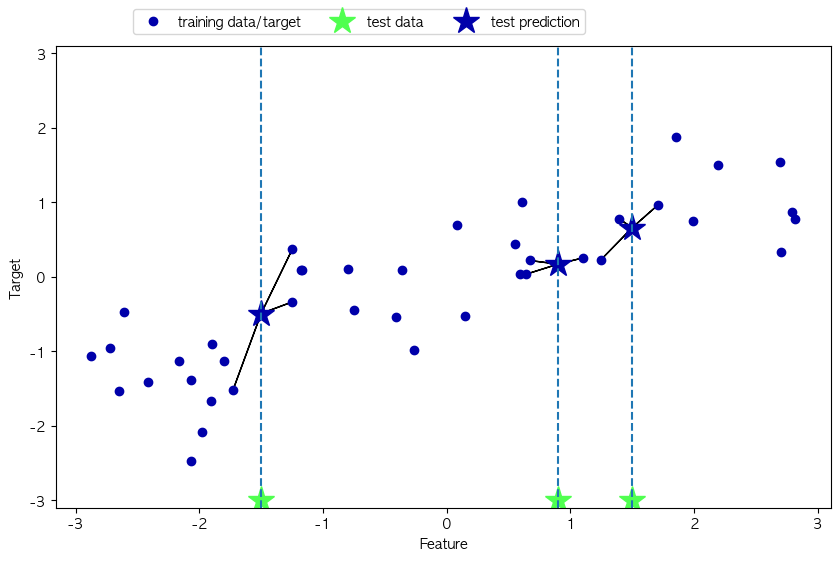

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


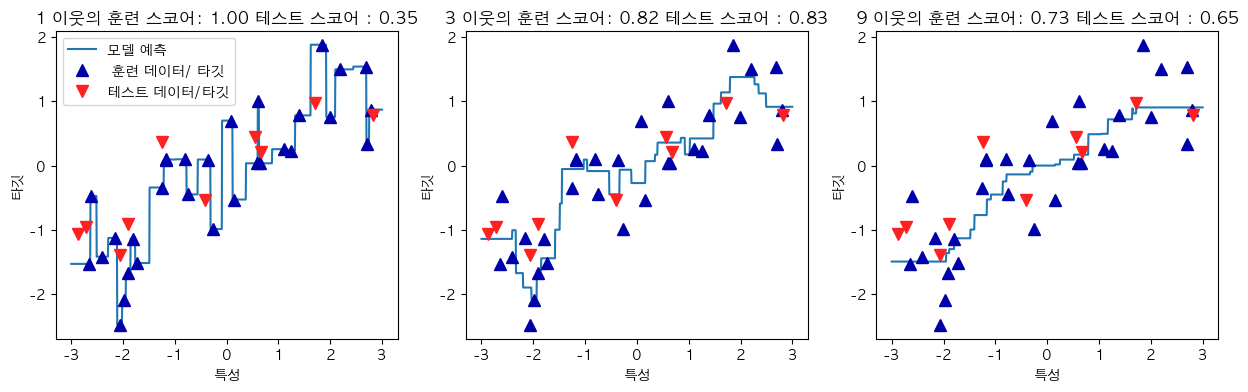

In [60]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
# 이웃의 수를 3으로 하여 모델의 객체를 만든다
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print("테스트 세트 예측:\n",reg.predict(X_test))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

fig,axes = plt.subplots(1,3,figsize=(15,4))
# -3과 3 사이에 1000개의 데이터 포인트를 만든다
line  = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어 : {:.2f}".format(n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", " 훈련 데이터/ 타깃","테스트 데이터/타깃"],loc="best")

- 이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나감  ==> 불안정한 예측  

KNeighbors 분류기에 중요한 매개변수
1. 데이터 포인트 사이의 거리를 재는 방법
2. 이웃의 수  

k-NN의 장점  
1. 이해하기 매우 쉬운 모델
2. 많이 조정하지 않아도 자주 좋은 성능을 발휘 => 복잡한 알고리즘 적용 전 시도 가능
* 훈련 세트가 매우 크면 예측이 느려짐 ==> 전처리 과정이 중요함

# 선형 회귀 (최소제곱법)  

- 평균제곱오차 (mean squred error) 를 최소화하는 파라미터 w, b 찾기  
    - w : 가중치, weight
    - b : 계수, coefficient

In [64]:
from sklearn.linear_model import LinearRegression 

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

print("lr.coef_:",lr.coef_)
print("lr.intercept_:",lr.intercept_)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675966
훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [65]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train,y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))



훈련 세트 점수: 0.95
테스트 세트 점수 : 0.61


- 모델 과대 적합됨.

# 리지 회귀 (Ridge Regression)  

- 가중치 선택 ==> 가중치의 절댓값을 가능한 작게 만드는 것이 목표 
- 이러한 제약을 규제 (regularization) 이라고 함
- 리지 회귀에서 사용하는 규제는 L2 규제

In [71]:
from sklearn.linear_model import Ridge

X,y = mglearn.datasets.load_extended_boston()
ridge = Ridge().fit(X_train,y_train)
print("Deefault alpha")
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))



# alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 지정
# alpha의 기본값은 1.0
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("\nalpha = 10")
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test,y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("\nalpha = 0.1")
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))

Deefault alpha
훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75

alpha = 10
훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64

alpha = 0.1
훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


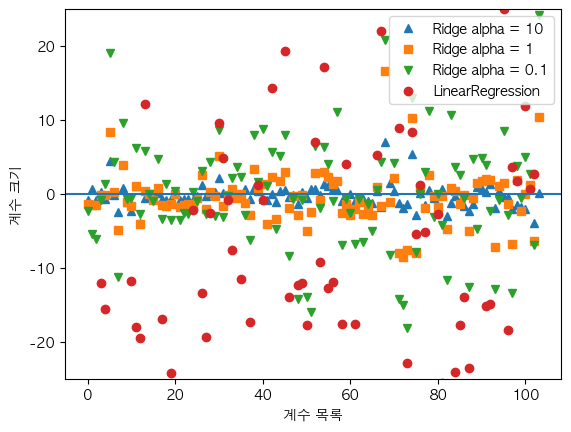

In [74]:
# alpha 값에 따른 모델의 coef_ 속성

plt.plot(ridge10.coef_,'^',label="Ridge alpha = 10")
plt.plot(ridge.coef_,'s',label="Ridge alpha = 1")
plt.plot(ridge01.coef_,'v',label='Ridge alpha = 0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
#plt.yscale('log')

규제의 효과를 이해하기 위해 alpha 값을 고정하고 훈련 데이터의 크기 변화시켜보기.   
학습 곡선 (learning curve) : 데이터셋의 크기에 따른 모델의 성능변화를 나타낸 그래프

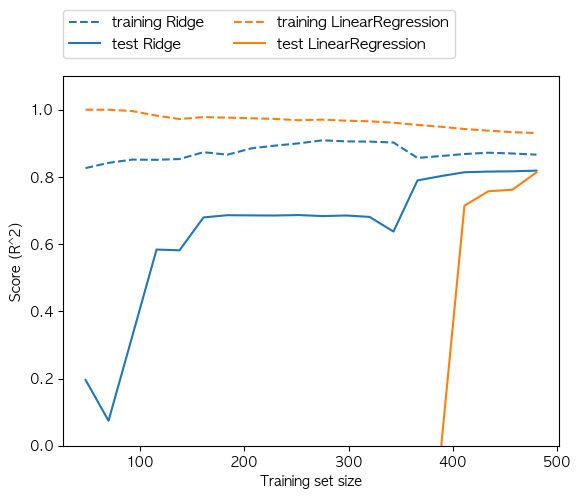

In [75]:
mglearn.plots.plot_ridge_n_samples()

- Ridge 클래스의 solver 매개변수에서 여러가지 알고리즘을 지정할 수 있음
    - 기본값은 'auto' -> 훈련 데이터가 희소 행렬이면 켤레기울기법 (Conjugate Gradient Method) 인 'sparse_cg' 를 사용하고, 그렇지 않으면 'cholesky' 를 사용함.  
    - 계수 값을 양수로 강제하기 위해 positive 매개변수를 True 로 지정하면 L-BFGS-B 알고리즘인 'lbfgs'가 사용됨.  
    - 확률적 평균 경사 하강법 (Stochastic Average Gradient Descent) 인 'sag'와 SAG 의 개선 버전인 'saga' 를 사용할 수 있음.

# 라소 

- 계수를 0 에 가깝게 만드려고 함.
- L1 규제 사용 ==> 모델에서 완전히 제외되는 특성이 생김. (특성 선택 (feature seelction) 이 자동으로 이뤄지는 것)

In [76]:
from sklearn.linear_model import Lasso 

lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 갯수 :",np.sum(lasso.coef_ !=0))


훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 갯수 : 4


104개의 특성 중 4개만 사용해 과소적합

In [79]:
# alpha 매개변수 조정

# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생함
print("alpha = 0.01")
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수 : ",np.sum(lasso001.coef_ != 0))

print("\nalpha=0.0001")
lasso0001 = Lasso(alpha=0.0001, max_iter = 50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso0001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso0001.score(X_test,y_test)))
print("사용한 특성의 개수 : ",np.sum(lasso0001.coef_ !=0))

alpha = 0.01
훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  33

alpha=0.0001
훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 :  96


Text(0, 0.5, '계수 크기')

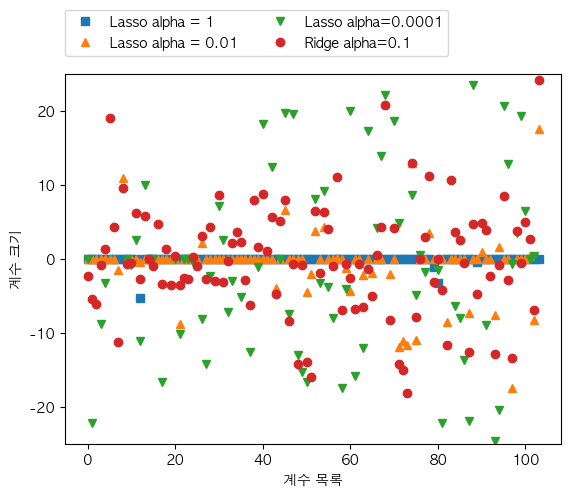

In [80]:
plt.plot(lasso.coef_,'s',label='Lasso alpha = 1')
plt.plot(lasso001.coef_,'^',label='Lasso alpha = 0.01')
plt.plot(lasso0001.coef_,'v',label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

보통은 리지 회귀를 선호함.  그러나 특성이 많고 그 중 일부만 중요하다면 Lasso 가 더 좋은 선택.  

scikit-learn은 lasso 와 ridge 의 패널티를 결합한 ElasticNet 도 제공함. 

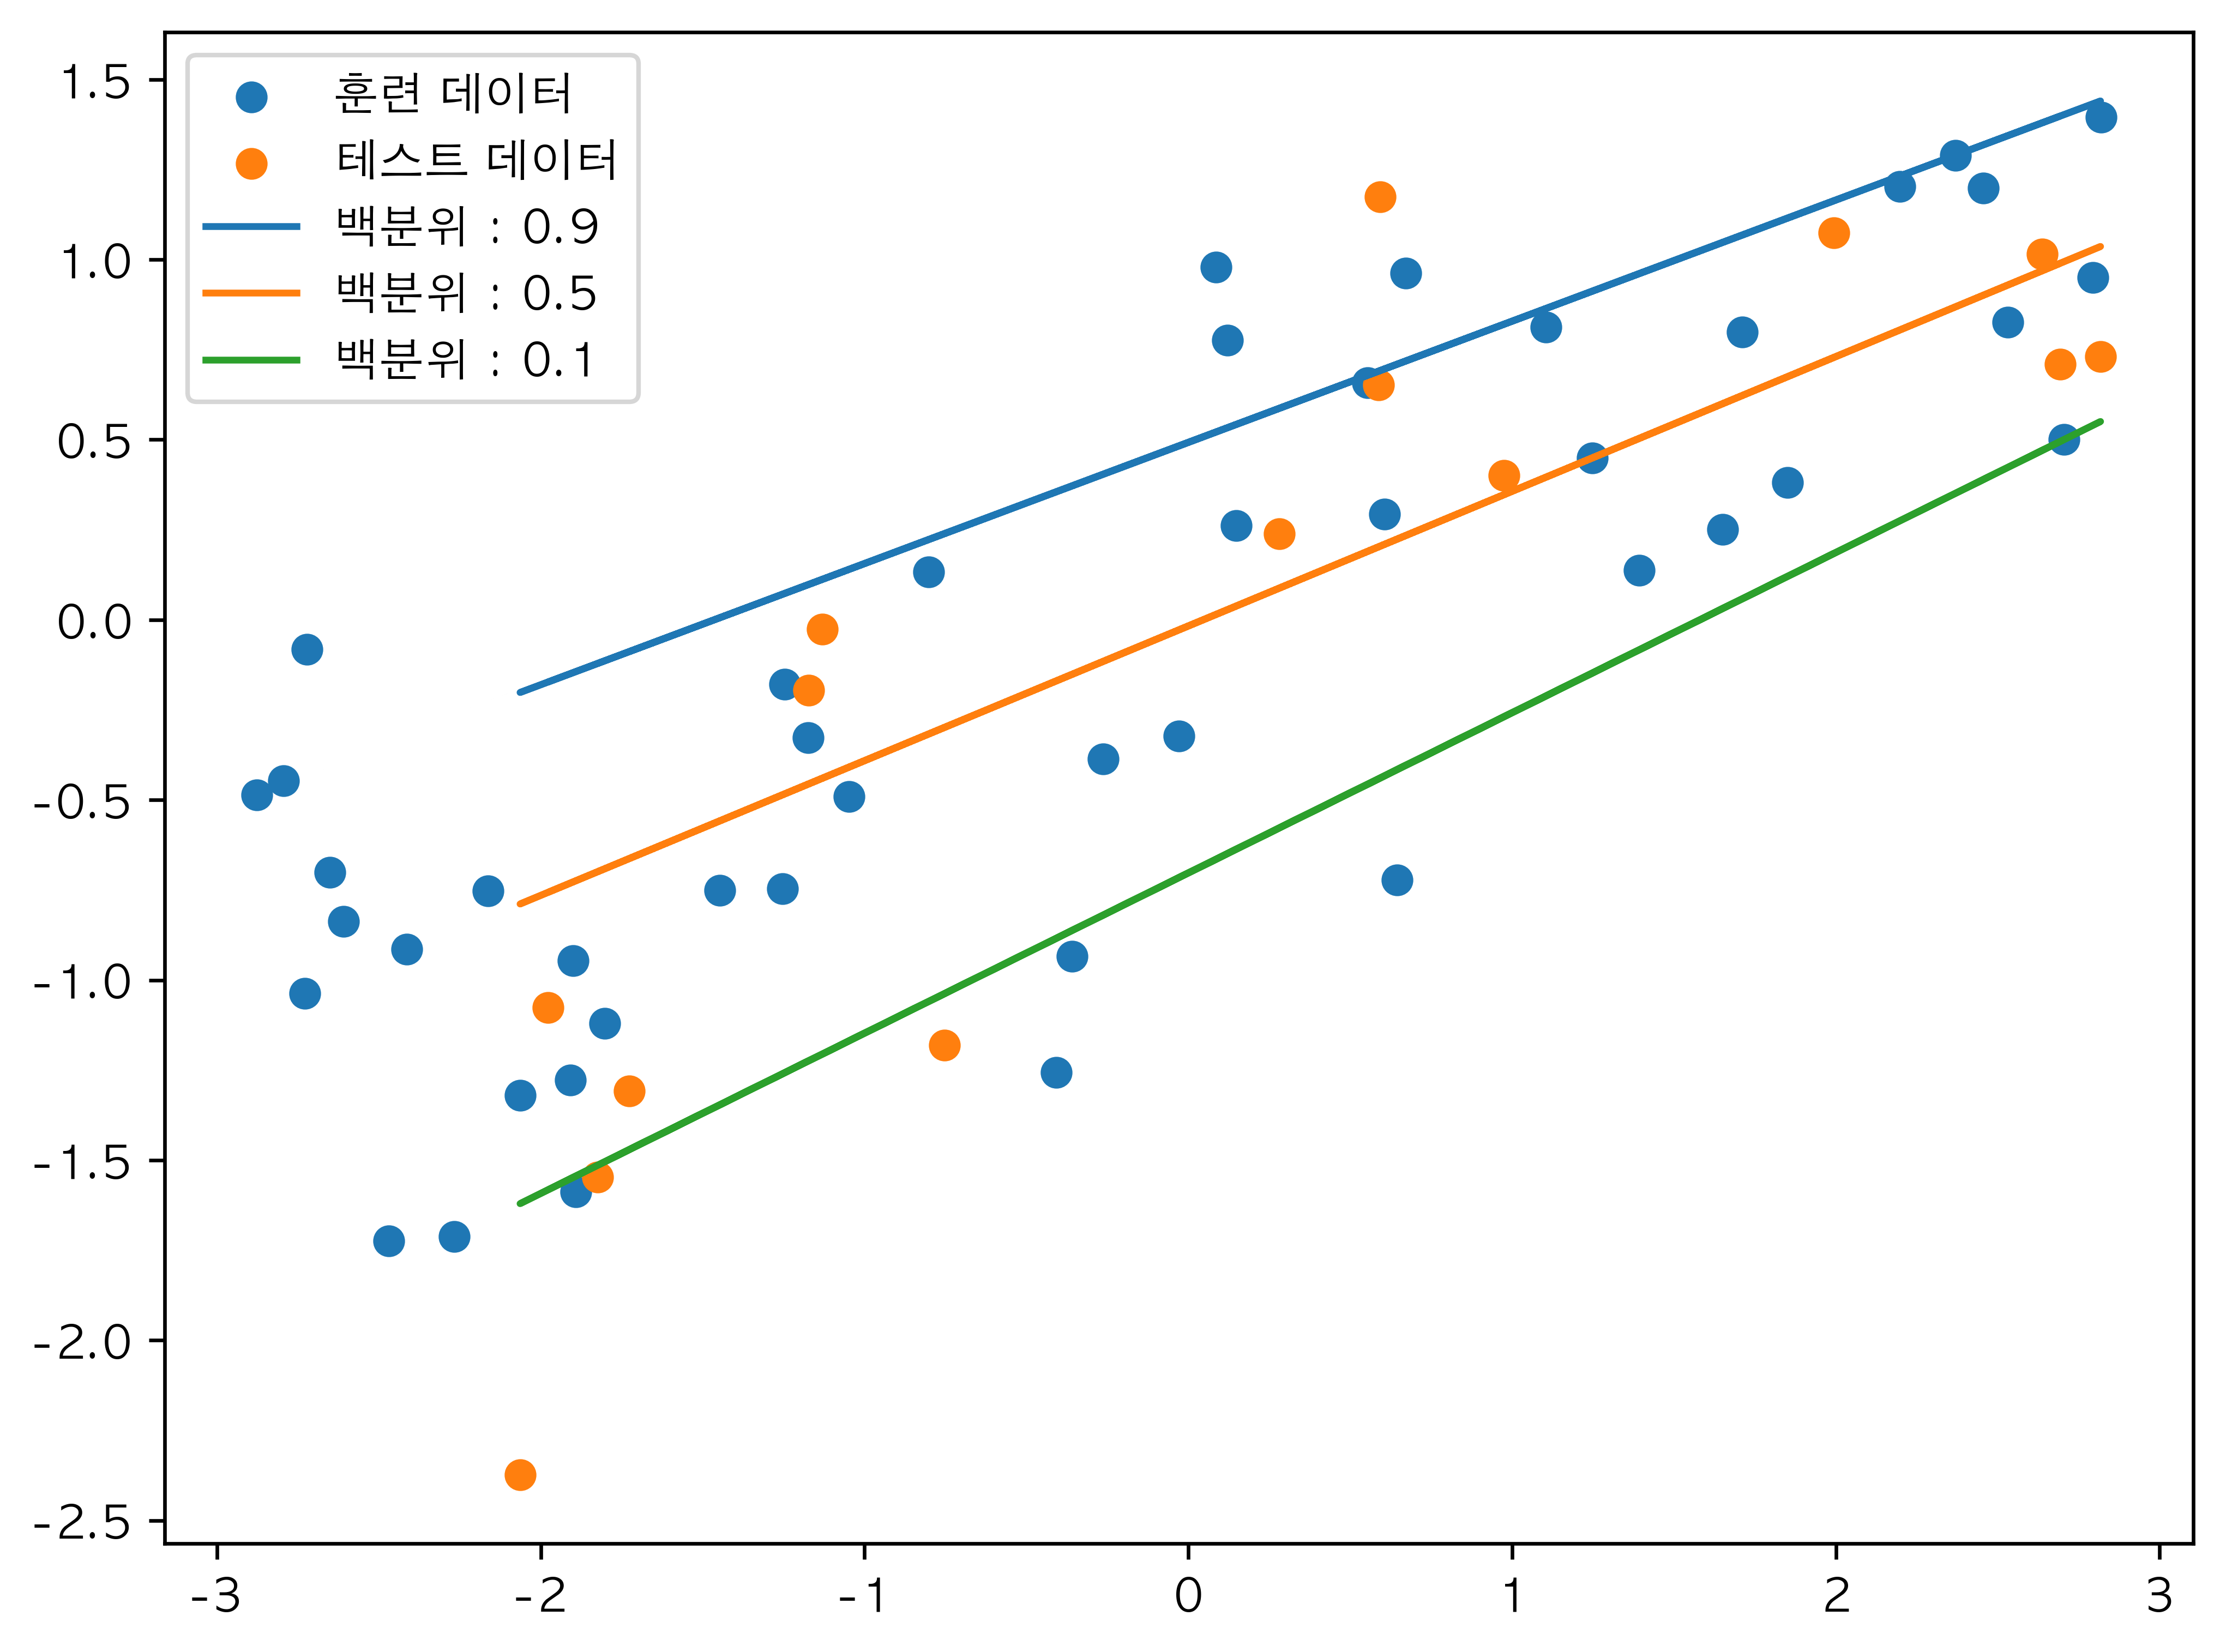

In [81]:
from sklearn.linear_model import QuantileRegressor

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train,y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5,alpha=0.01).fit(X_train,y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1,alpha=0.01).fit(X_train,y_train).predict(X_test)

plt.figure(figsize=(8,6),dpi=600)
plt.scatter(X_train,y_train,label="훈련 데이터")
plt.scatter(X_test,y_test,label="테스트 데이터")
plt.plot(X_test,pred_up,label='백분위 : 0.9')
plt.plot(X_test,pred_med,label="백분위 : 0.5")
plt.plot(X_test,pred_low,label="백분위 : 0.1")
plt.legend()
plt.show()

# 이진 분류 (binary classification) 

예측을 위한 방정식  
$\hat{y}=w[0]\times x[0] + w[1]\times x[1]+\dots+w[p]\times x[p] + b >0$  
특성들의 예측한 값을 임계치 0과 비교함.  
    - 함수에서 계산한 값이 0보다 작으면 ==> 클래스 -1, -보다 크면 ==> +1    

- 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수.  
- 손실함수 (loss function)에 대한 차이는 크게 중요하지 않음.  

선형 분류 알고리즘  
- 로지스틱 회귀 (logistic regression)
- 서포트 벡터 머신 (support vector machine)

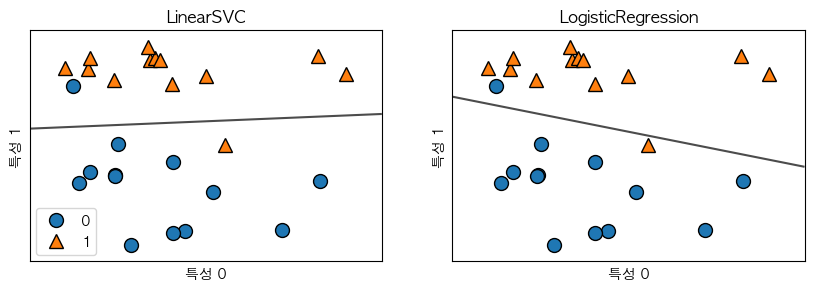

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5, ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

두 모델은 기본적으로 L2 규제 사용  
규제의 강도는 매개변수 C를 통해 결정. C가 높아지면 규제가 감소함.  

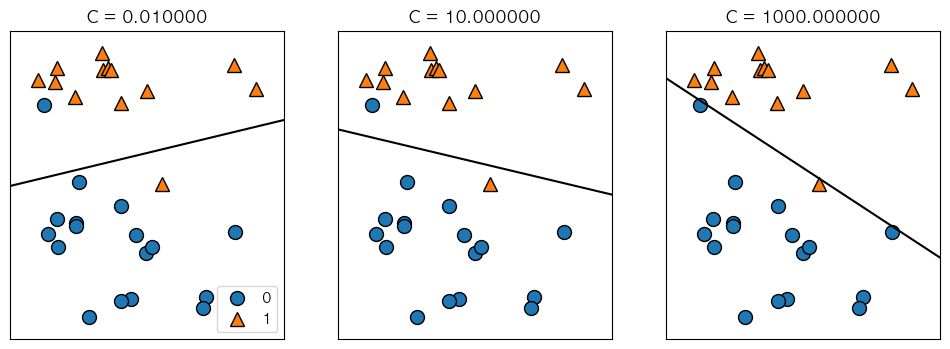

In [83]:
mglearn.plots.plot_linear_svc_regularization()

## 유방암 데이터셋을 사용한 LogisticRegression

In [84]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test,y_test)))



훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [ ]:
# C 증가 ==> 복잡도가 높은 모델일수록 성능이 좋음
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965


/Users/isumi/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# C= 0.01  ==> 과소적합되어 훈련세트와 테스트 세트의 정확도는 기본 매개변수일때보다는 낮아짐
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


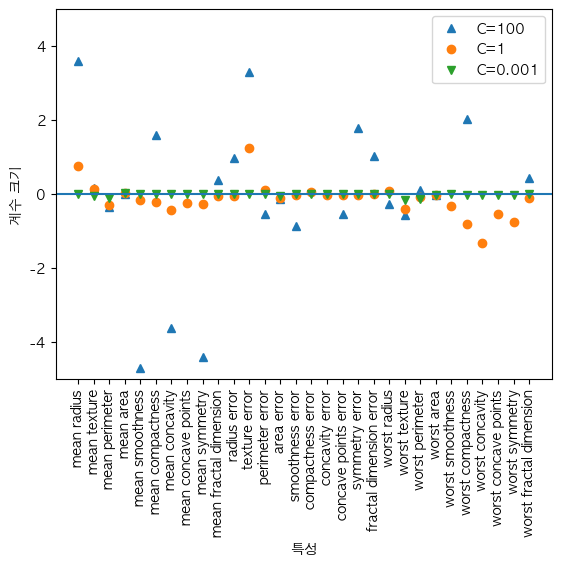

In [ ]:
# model's coefficients depends on regularization parameter C 

plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg001.coef_.T,'v',label='C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

L1 규제 사용

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


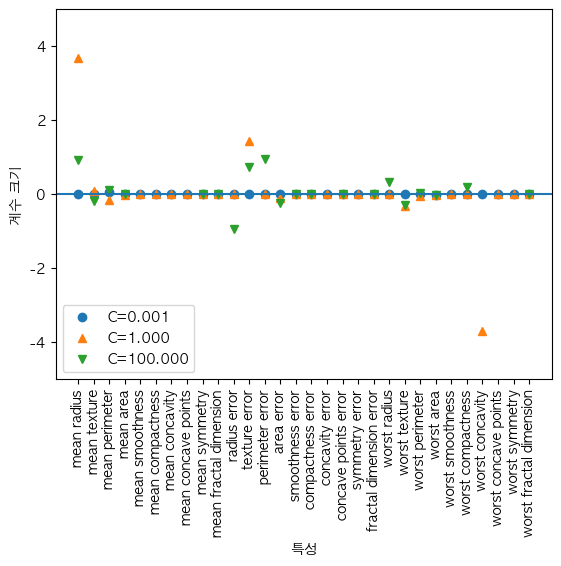

In [89]:
for C, marker in zip ([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(solver='liblinear',C=C,penalty='l1',max_iter=1000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)